# Clase 9 - Reconocimiento de Patrones en Imagenes

En este notebook se analiza una imagen de gotas de lluvia, segmentando y filtrando las gotas según su área y orientación.

Pasos típicos:
- **Preprocesamiento**: Conversión a escala de grises y binarización para simplificar la imagen.
- **Segmentación**: Separar objetos del fondo usando técnicas como el etiquetado de regiones.
- **Extracción de características**: Medir propiedades como área, orientación, forma, etc.
- **Filtrado y análisis**: Seleccionar objetos según criterios y visualizar resultados.

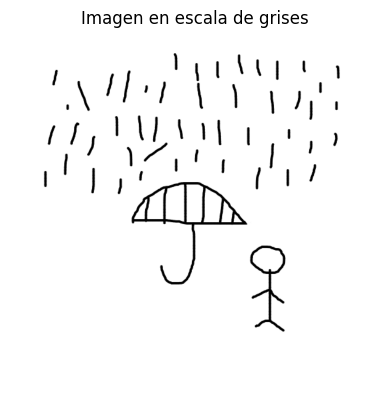

In [1]:
# Importar librerías para procesamiento y visualización de imágenes
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en color
img = cv2.imread('../IMG/lluvia_2.png')

# Convertir la imagen a escala de grises para simplificar el análisis
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
plt.figure()
plt.imshow(gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()

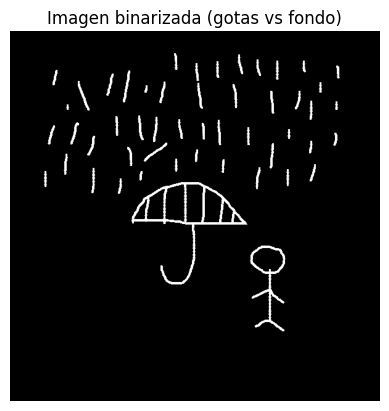

In [2]:
# Aplicar umbral binario inverso para separar gotas del fondo
ret, bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Mostrar la imagen binarizada
plt.figure()
plt.imshow(bw, cmap='gray')
plt.title('Imagen binarizada (gotas vs fondo)')
plt.axis('off')
plt.show()

Número de regiones detectadas: 51


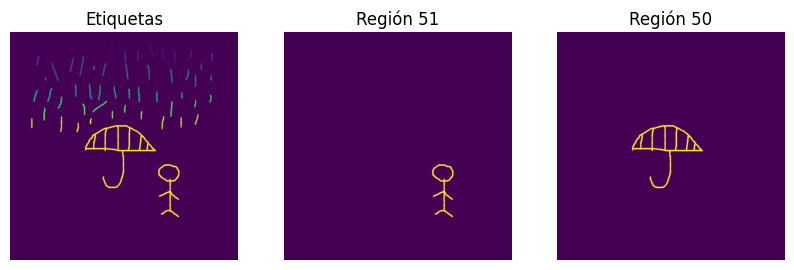

In [3]:
# Importar funciones para etiquetado y análisis de regiones
from skimage.measure import label, regionprops
import numpy as np

# Etiquetar cada objeto en la imagen binaria
eq = label(bw)

# Imprimir el número de regiones detectadas
print('Número de regiones detectadas:', np.max(eq))

# Visualizar etiquetas y ejemplos de regiones específicas
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(10)
ax[0].imshow(eq)
ax[0].set_title('Etiquetas')
ax[1].imshow(eq == 51)
ax[1].set_title('Región 51')
ax[2].imshow(eq == 50)
ax[2].set_title('Región 50')
for a in ax:
    a.axis('off')
plt.show()

Propiedades de las regiones: [<skimage.measure._regionprops.RegionProperties object at 0x78672a0c05f0>, <skimage.measure._regionprops.RegionProperties object at 0x7866f0359370>, <skimage.measure._regionprops.RegionProperties object at 0x78672a0c0200>, <skimage.measure._regionprops.RegionProperties object at 0x78672a0c2510>, <skimage.measure._regionprops.RegionProperties object at 0x78672a0c01a0>, <skimage.measure._regionprops.RegionProperties object at 0x78672a0c08c0>, <skimage.measure._regionprops.RegionProperties object at 0x7866f01066f0>, <skimage.measure._regionprops.RegionProperties object at 0x7866f0107ad0>, <skimage.measure._regionprops.RegionProperties object at 0x7866fffa6510>, <skimage.measure._regionprops.RegionProperties object at 0x7866f03275c0>, <skimage.measure._regionprops.RegionProperties object at 0x7866f03252b0>, <skimage.measure._regionprops.RegionProperties object at 0x78671ebaa3c0>, <skimage.measure._regionprops.RegionProperties object at 0x78671eba90d0>, <skimage

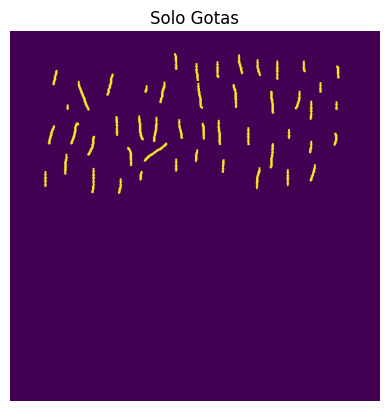

In [4]:
# Calcular propiedades de cada región etiquetada
sts = regionprops(label_image=eq)

print('Propiedades de las regiones:', sts)

# Inicializar matrices para almacenar gotas pequeñas y orientación
gotas = np.zeros_like(bw)
ang = np.zeros_like(bw)

# Filtrar regiones por área: seleccionar gotas pequeñas (<200 píxeles)
for region in sts:
    if region.area < 200:
        gotas = np.logical_or(gotas, eq == region.label)

# Visualizar las gotas pequeñas detectadas
plt.figure()
plt.imshow(gotas)
plt.title('Solo Gotas')
plt.axis('off')
plt.show()

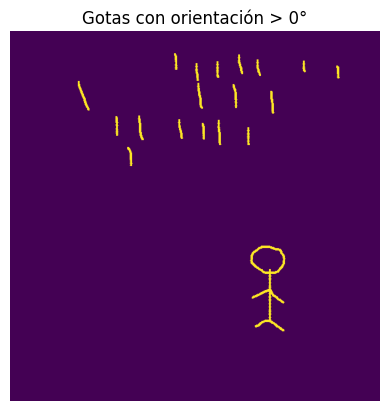

In [5]:
# Filtrar regiones por orientación: seleccionar gotas con orientación positiva
for region in sts:
    if np.rad2deg(region.orientation) > 0:
        ang = np.logical_or(ang, eq == region.label)

# Visualizar las gotas con orientación positiva
plt.figure()
plt.imshow(ang)
plt.title('Gotas con orientación > 0°')
plt.axis('off')
plt.show()

### Interpretación de resultados y utilidad
- El procesamiento permite identificar y analizar gotas de lluvia en la imagen según su tamaño y orientación.
- El filtrado por área ayuda a distinguir gotas pequeñas, que pueden tener diferente comportamiento físico.
- El filtrado por orientación permite estudiar la dirección predominante de las gotas.